# README.md
Build some initial statistics

1) What are the enrichments from the notes? 
2) How many pts don’t have a start date? End date? How many are overlapped? And for each drug?
3) Run through the pipeline to get the start and end date distribution, and duration
4) Validate by manual chart reviews for 15 random pts (computational vs manual)

# Step1, read from spreadsheet, clean up, and get statistics

In [1]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [2]:
df1=pd.read_excel("large_tableA.xls", header=0)
df1.fillna('', inplace=True)

In [3]:
index_list=df1.columns
index_list

Index(['person_id', 'cancer_drug', 'category', 'start_date_source',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 'start_date_year',
       'start_date_month', 'start_date_day', 'end_date_source',
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'end_date_year',
       'end_date_month', 'end_date_day', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text'],
      dtype='object')

In [4]:
#delete empty columns

print(df1.shape)
del_col=['category',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text']

for col in del_col:
    del df1[col]
print(df1.shape)

(2015, 29)
(2015, 10)


In [5]:
df1[:5]

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
0,2,Leuprolide,Notes,2009,2,26,MedTable,2017,2,1
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
3,13,Degarelix,,,,,,,,
4,13,Goserelin,MedTable,2010,6,17,MedTable,2012,8,30


In [6]:
df2=df1

# Research question: How many drug use counts are from the MedTable for start date, and how many are from the Notes? 
For the end date? How many have missing values?     

In [7]:
start_note_list=[]
start_med_list=[]

end_note_list=[]
end_med_list=[]

for ind in df1.index:
 
    if (df1['start_date_source'][ind]=='Notes'): 
        start_note_list.append(ind)  
    if (df1['start_date_source'][ind]=='MedTable'): 
        start_med_list.append(ind)     
        
    if (df1['end_date_source'][ind]=='Notes'): 
        end_note_list.append(ind)  
    if (df1['end_date_source'][ind]=='MedTable'): 
        end_med_list.append(ind)     

print("start_note ", len(start_note_list))
print("start_med ", len(start_med_list))
print("start_nan ", df1['start_date_source'].isnull().sum())
print("total_start", len(start_note_list)+len(start_med_list)+df1['start_date_source'].isnull().sum())
print(" ")
print("end_note ", len(end_note_list))
print("end_med ", len(end_med_list))
print("end_nan ", df1['end_date_source'].isnull().sum())
print("total_end", len(end_note_list)+len(end_med_list)+df1['end_date_source'].isnull().sum())

start_note  877
start_med  681
start_nan  0
total_start 1558
 
end_note  307
end_med  879
end_nan  0
total_end 1186


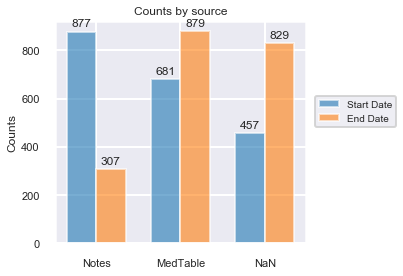

In [8]:
labels = ['Notes', 'MedTable', 'NaN']
start_counts = [877, 681, 457]
end_counts = [307, 879, 829]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, start_counts, width, label='Start Date', alpha=0.6)
rects2 = ax.bar(x + width/2, end_counts, width, label='End Date', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by source')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [9]:
#how many lines that have both start and end date as nan?
#these correspond to how many patients?

df1_start_null=df1[df1['start_date_source'].isnull()]
df1_end_null=df1[df1['end_date_source'].isnull()]

#group to pt level
df2_start=df1_start_null.groupby(["person_id"]).size().reset_index(name='counts')
df2_end=df1_end_null.groupby(["person_id"]).size().reset_index(name='counts')

In [10]:
print("# of lines with start date empty: ", shape(df1_start_null)[0])
print("# of lines with end date empty: ", shape(df1_end_null)[0])

# of lines with start date empty:  0
# of lines with end date empty:  0


In [11]:
list_pts_start_empty=df2_start["person_id"].to_list()
print(len(list_pts_start_empty))
list_pts_end_empty=df2_end["person_id"].to_list()
print(len(list_pts_end_empty))

0
0


In [12]:
test1=[x for x in list_pts_start_empty if x in list_pts_end_empty]
print("# of pts that have no start nor end :",len(test1))
test2=[x for x in list_pts_start_empty if x not in list_pts_end_empty]
print("# of pts that no start but with end :",len(test2))
test3=[x for x in list_pts_end_empty if x not in list_pts_start_empty]
print("# of pts that have start but not end :",len(test3))

#list_pts_bothdates_empty=set(list_pts_start_empty).intersection(list_pts_end_empty)
#print("number of pts with both start and end empty: ", len(list_pts_bothdates_empty))

# of pts that have no start nor end : 0
# of pts that no start but with end : 0
# of pts that have start but not end : 0


In [13]:
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triporelin","Histrelin"]

In [14]:
#row counts
df_startmed_group=df1.groupby(["cancer_drug","start_date_source"]).size() 
df_startmed_group

cancer_drug  start_date_source
Degarelix                         100
             MedTable              97
             Notes                245
Goserelin                          41
             MedTable              87
             Notes                 41
Histrelin                           6
             MedTable               1
             Notes                  1
Leuprolide                        289
             MedTable             486
             Notes                576
Triptorelin                        21
             MedTable              10
             Notes                 14
dtype: int64

In [15]:
#on the patient level 

df_startmedpt_group=df1.groupby(["cancer_drug","person_id"]).size() 
df_startmedpt_group

cancer_drug  person_id
Degarelix    13           1
             18           1
             81           1
             110          1
             137          1
                         ..
Triptorelin  36546        1
             167219       1
             170686       1
             182373       1
             190946       1
Length: 2015, dtype: int64

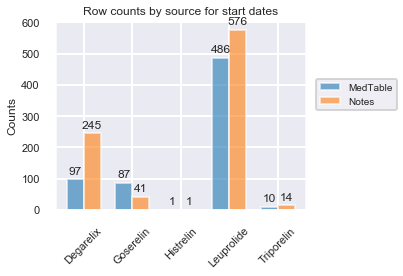

In [16]:
labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triporelin"]
start_med = [97,87,1,486,10]
start_note = [245,41,1,576,14]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, start_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, start_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for start dates')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

(<Figure size 662.4x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff8991c2050>)

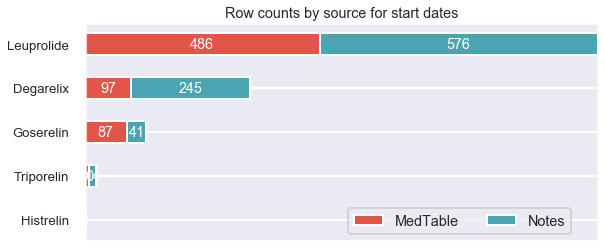

In [17]:
category_names = ['MedTable', 'Notes']
results = {
    "Leuprolide": [486,576],
    "Degarelix": [97, 245],
    "Goserelin": [87,41],
    "Triporelin": [10,14],
    "Histrelin": [1,1]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Spectral')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(9.2, 4))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Row counts by source for start dates')
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

In [18]:
df_endmed_group=df1.groupby(["cancer_drug","end_date_source"]).size() 
#.reset_index(name='counts')
df_endmed_group

cancer_drug  end_date_source
Degarelix                       242
             MedTable           112
             Notes               88
Goserelin                        65
             MedTable            79
             Notes               25
Histrelin                         8
Leuprolide                      483
             MedTable           682
             Notes              186
Triptorelin                      31
             MedTable             6
             Notes                8
dtype: int64

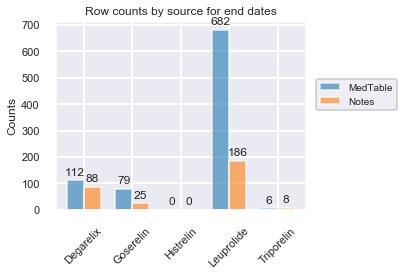

In [19]:
#plot row counts chart for end date grouped by drugs

labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triporelin"]
end_med = [112,79,0,682,6]
end_note = [88,25,0,186,8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, end_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, end_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for end dates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

(<Figure size 662.4x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff868aec3d0>)

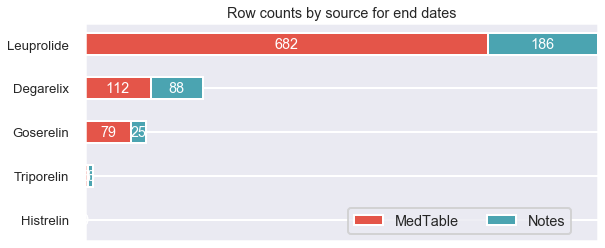

In [20]:
category_names = ['MedTable', 'Notes']
results = {
    "Leuprolide": [682,186],
    "Degarelix": [112,88],
    "Goserelin": [79,25],
    "Triporelin": [6,8],
    "Histrelin": [0,0]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Spectral')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(9.2, 4))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Row counts by source for end dates')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

# Get data into shape and run through the Step B pipeline

In [21]:
##step 3.1. combine year, month and day into date and convert into python datetime format
## step 3.2. make sure they take nan or blank lines
## step 3.3. groupby person id
df2[:5]

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
0,2,Leuprolide,Notes,2009,2,26,MedTable,2017,2,1
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
3,13,Degarelix,,,,,,,,
4,13,Goserelin,MedTable,2010,6,17,MedTable,2012,8,30


In [22]:
df2['start_date_source'].replace('', np.nan, inplace=True)
df2['start_date_year'].replace('', np.nan, inplace=True)
df2['start_date_month'].replace('', np.nan, inplace=True)
df2['start_date_day'].replace('', np.nan, inplace=True)

df2['end_date_source'].replace('', np.nan, inplace=True)
df2['end_date_year'].replace('', np.nan, inplace=True)
df2['end_date_month'].replace('', np.nan, inplace=True)
df2['end_date_day'].replace('', np.nan, inplace=True)

In [23]:
dftest=df2

In [24]:
dftest["start_date"]=pd.to_datetime((dftest.start_date_year*10000 + dftest.start_date_month*100+dftest.start_date_day).apply(str),format='%Y%m%d')
dftest["end_date"]=pd.to_datetime((dftest.end_date_year*10000 + dftest.end_date_month*100+dftest.end_date_day).apply(str),format='%Y%m%d')

In [25]:
#define a subtable 
df3=dftest[['person_id', 'cancer_drug', 'start_date', 'end_date']]

In [26]:
#df4 is a groupby person_id table
df4=df3.groupby(["person_id"]).size().reset_index(name='counts')

In [27]:
df4["counts"].max()
df4[(df4["counts"] == 4)]

,person_id,counts
326,9533,4


In [28]:
df4

,person_id,counts
0,2,1
1,12,1
2,13,3
3,18,2
4,22,1
...,...,...
1509,203736,1
1510,203796,1
1511,204648,1
1512,205144,1


In [29]:
#get the list of pt ids
list_pts=df4["person_id"].to_list()
list_pts
print("number of patients is:")
len(list_pts)

number of patients is:


1514

In [30]:
df3[:10]

,person_id,cancer_drug,start_date,end_date
0,2,Leuprolide,2009-02-26,2017-02-01
1,12,Leuprolide,2013-05-06,NaT
2,13,Leuprolide,2010-09-09,2018-05-17
3,13,Degarelix,NaT,NaT
4,13,Goserelin,2010-06-17,2012-08-30
5,18,Goserelin,2013-12-09,2014-03-13
6,18,Degarelix,2013-11-12,NaT
7,22,Leuprolide,2010-09-27,2017-04-24
8,25,Leuprolide,2013-11-12,2014-02-18
9,26,Leuprolide,2014-11-26,NaT


In [31]:
df_ptcheck=df3[(df3["person_id"] == 9533)]
df_ptcheck

,person_id,cancer_drug,start_date,end_date
433,9533,Leuprolide,2015-06-01,2020-08-19
434,9533,Degarelix,2012-03-08,2015-04-06
435,9533,Triptorelin,2012-01-19,NaT
436,9533,Goserelin,2014-07-24,NaT


In [32]:
list_pts

[2,
 12,
 13,
 18,
 22,
 25,
 26,
 37,
 38,
 53,
 81,
 95,
 110,
 119,
 121,
 125,
 132,
 137,
 153,
 267,
 275,
 300,
 301,
 323,
 341,
 372,
 386,
 387,
 435,
 776,
 778,
 780,
 793,
 800,
 870,
 905,
 939,
 955,
 957,
 963,
 1160,
 1181,
 1211,
 1229,
 1231,
 1238,
 1257,
 1263,
 1280,
 1366,
 1503,
 1508,
 1538,
 1550,
 1583,
 1611,
 1618,
 1639,
 1657,
 1658,
 1704,
 1713,
 1733,
 1737,
 1881,
 1883,
 1885,
 1887,
 1910,
 1934,
 1936,
 1964,
 2058,
 2061,
 2063,
 2088,
 2133,
 2170,
 2173,
 2178,
 2200,
 2237,
 2256,
 2278,
 2482,
 2505,
 2507,
 2526,
 2531,
 2557,
 2561,
 2590,
 2605,
 2623,
 2628,
 2631,
 2652,
 2655,
 2656,
 2660,
 2664,
 2683,
 2713,
 2979,
 3030,
 3079,
 3084,
 3085,
 3129,
 3131,
 3138,
 3145,
 3155,
 3177,
 3181,
 3305,
 3344,
 3354,
 3385,
 3391,
 3396,
 3415,
 3419,
 3445,
 3519,
 3573,
 3574,
 3576,
 3578,
 3579,
 3581,
 3618,
 3619,
 3666,
 3667,
 3697,
 3854,
 3874,
 3895,
 3905,
 3920,
 3940,
 3944,
 3951,
 3963,
 3964,
 3976,
 3993,
 3995,
 4056,
 40

In [33]:
result_list=[]

for y in list_pts:      
#for y in [2,12,13,18,22]:
#for y in [12,13]:

    #subset the dataframe to each pt
    #get start dates and end dates to lists
    df_pt=df3[(df3["person_id"] == y)]
    
    each_pt_drug_start = df_pt['start_date'].to_list()
    each_pt_drug_end = df_pt['end_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_drug_start if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    cleaned_b=[]
    cleaned_b= [x for x in each_pt_drug_end if str(x) != 'NaN']
    cleaned_bb= [x for x in cleaned_b if str(x) != 'nan']
    cleaned_bbb= [x for x in cleaned_bb if str(x) != 'NaT']

    ##get the date format right
    #startdatebin=[datetime.fromisoformat(str(x)) for x in cleaned_aa]
    #enddatebin=[datetime.fromisoformat(str(x)) for x in cleaned_bb]

    #sort 
    start_sorted_bin=sorted(cleaned_aaa)
    end_sorted_bin=sorted(cleaned_bbb)
    
    start_with_2round=[]
    start_with_1round=[]
    
    if(len(start_sorted_bin)==0):
        startdate='NaN'  
        
    if(len(start_sorted_bin)>0):
        a=start_sorted_bin[0]
        
        for b in start_sorted_bin:
        #find all adt starting dates after 6months of inital starting    
            if float(abs(a-b).days)>182.5:
                start_with_2round.append(a)
                start_with_2round.append(b)
            else:
                start_with_1round.append(a) 
        #cleanup 
        start_with_2round=start_with_2round[:2]

        #get rid of repeated capturing for one round
        cleanlist = []
        for i in start_with_1round:
            if i not in cleanlist:
                cleanlist.append(i)
        start_with_1round=cleanlist
        #print(cleanlist)
        enddateall=[]

    if len(end_sorted_bin)==0:
        enddate='NaN'
        if(len(start_sorted_bin)==0):
            startdate='NaN' 
        if(len(start_sorted_bin)>0):    
            startdate=start_with_1round[0]
        
    if len(end_sorted_bin)>0:
        for i in end_sorted_bin:
        #at least two rounds of ADTs
            if len(start_with_2round)==2:
                if(i>=sorted(start_with_2round)[0]) and (i<=sorted(start_with_2round)[1]):
                    startdate=sorted(start_with_2round)[0]
                    enddateall.append(i)
                    #print(enddateall)
                #pick the one that is most close to the 2nd adt starting date
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]

                if(i>sorted(start_with_2round)[0]) and (i>sorted(start_with_2round)[1]) and (len(enddateall) == 0):
                    startdate=sorted(start_with_2round)[0]
                    enddate='NaN'
                    #leave it as empty
        
        #only one round           
            if (len(start_with_2round)<2) and (len(start_with_1round)==1):
                if(i>=sorted(start_with_1round)[0]):
                    startdate=start_with_1round[0]
                    enddateall.append(i)
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]
                           
    print(y, startdate, enddate)
    result_per_pt=[y,startdate, enddate]
    result_list.append(result_per_pt)

2 2009-02-26 00:00:00 2017-02-01 00:00:00
12 2013-05-06 00:00:00 NaN
13 2010-06-17 00:00:00 2018-05-17 00:00:00
18 2013-11-12 00:00:00 2014-03-13 00:00:00
22 2010-09-27 00:00:00 2017-04-24 00:00:00
25 2013-11-12 00:00:00 2014-02-18 00:00:00
26 2014-11-26 00:00:00 NaN
37 2010-09-29 00:00:00 2016-09-02 00:00:00
38 2015-11-18 00:00:00 2016-07-18 00:00:00
53 2013-02-25 00:00:00 NaN
81 2013-09-25 00:00:00 NaN
95 2011-01-05 00:00:00 2014-04-23 00:00:00
110 2013-03-12 00:00:00 NaN
119 2013-07-02 00:00:00 2013-10-02 00:00:00
121 2013-04-10 00:00:00 NaN
125 2016-01-25 00:00:00 2020-09-02 00:00:00
132 2015-04-13 00:00:00 2016-07-13 00:00:00
137 2015-06-29 00:00:00 2020-09-10 00:00:00
153 2014-07-02 00:00:00 2020-02-12 00:00:00
267 2015-05-19 00:00:00 2016-05-12 00:00:00
275 2019-12-09 00:00:00 2020-09-15 00:00:00
300 2016-09-17 00:00:00 NaN
301 NaN NaN
323 2015-09-09 00:00:00 2016-09-07 00:00:00
341 2016-05-18 00:00:00 2017-05-19 00:00:00
372 NaN NaN
386 2016-09-06 00:00:00 NaN
387 2018-05-29 00

9124 2014-07-09 00:00:00 NaN
9173 2015-05-19 00:00:00 2016-04-27 00:00:00
9232 2016-05-16 00:00:00 2016-09-15 00:00:00
9233 2015-01-30 00:00:00 2016-12-05 00:00:00
9235 NaN NaN
9437 2017-07-31 00:00:00 2018-01-22 00:00:00
9474 2011-07-19 00:00:00 NaN
9477 2017-02-10 00:00:00 NaN
9485 NaN NaN
9511 2014-04-25 00:00:00 NaN
9533 2012-01-19 00:00:00 NaN
9541 2015-10-12 00:00:00 2016-03-25 00:00:00
9577 NaN 2016-03-25 00:00:00
9741 NaN 2016-03-25 00:00:00
9765 NaN 2016-03-25 00:00:00
9778 NaN NaN
9792 2017-02-08 00:00:00 NaN
9864 2011-03-16 00:00:00 NaN
9887 NaN NaN
9888 2017-09-14 00:00:00 2020-08-12 00:00:00
9922 NaN NaN
9963 2020-08-19 00:00:00 2020-11-09 00:00:00
9972 2017-03-30 00:00:00 2017-10-20 00:00:00
9975 2017-10-09 00:00:00 2018-03-20 00:00:00
9979 NaN NaN
9984 2015-02-04 00:00:00 NaN
10084 2018-06-05 00:00:00 2018-11-30 00:00:00
10085 2017-03-27 00:00:00 2018-01-04 00:00:00
10114 2019-11-18 00:00:00 2020-08-13 00:00:00
10124 2014-05-08 00:00:00 2014-09-04 00:00:00
10203 2018-07-

17559 2015-07-27 00:00:00 2015-11-24 00:00:00
17580 2017-10-18 00:00:00 2020-02-10 00:00:00
17638 2012-07-03 00:00:00 NaN
17662 2013-12-19 00:00:00 2020-09-30 00:00:00
17684 NaN NaN
17687 NaN NaN
17709 2013-09-16 00:00:00 2013-10-14 00:00:00
17710 2017-07-05 00:00:00 2020-09-21 00:00:00
17716 NaN NaN
17759 2014-09-05 00:00:00 2015-05-29 00:00:00
17782 2015-07-23 00:00:00 2019-04-15 00:00:00
17793 2014-08-05 00:00:00 2015-05-22 00:00:00
17824 2010-10-26 00:00:00 NaN
17865 2014-08-01 00:00:00 2014-12-17 00:00:00
18010 2018-08-13 00:00:00 NaN
18025 2018-01-22 00:00:00 2020-10-12 00:00:00
18031 NaN 2020-10-12 00:00:00
18071 2017-09-29 00:00:00 2020-07-17 00:00:00
18092 NaN NaN
18225 NaN NaN
18232 NaN NaN
18246 NaN NaN
18253 2016-07-18 00:00:00 2019-09-25 00:00:00
18254 NaN NaN
18266 NaN NaN
18303 2017-02-06 00:00:00 2019-09-05 00:00:00
18306 2018-05-30 00:00:00 2018-09-12 00:00:00
18356 2015-02-25 00:00:00 2020-10-12 00:00:00
18357 2014-05-02 00:00:00 2015-03-05 00:00:00
18362 2018-05-31 0

27563 2011-06-27 00:00:00 2014-05-01 00:00:00
27570 NaN NaN
27581 NaN NaN
27583 2019-06-03 00:00:00 2019-11-08 00:00:00
27611 2020-03-20 00:00:00 2020-10-16 00:00:00
27619 2018-04-09 00:00:00 2019-12-02 00:00:00
27625 2020-04-10 00:00:00 2020-07-08 00:00:00
27656 2010-10-13 00:00:00 2011-09-19 00:00:00
27661 2013-04-02 00:00:00 2016-04-08 00:00:00
27666 NaN NaN
27685 2013-06-26 00:00:00 2020-10-07 00:00:00
27710 2017-02-01 00:00:00 NaN
27745 2019-12-06 00:00:00 2020-09-11 00:00:00
27766 2015-12-01 00:00:00 2019-06-28 00:00:00
27769 2016-12-30 00:00:00 2017-08-11 00:00:00
27788 2015-08-28 00:00:00 2019-05-21 00:00:00
27937 2016-09-27 00:00:00 2020-07-10 00:00:00
27944 2019-09-09 00:00:00 2020-11-11 00:00:00
27945 NaN NaN
27964 2014-08-26 00:00:00 2014-09-09 00:00:00
27965 2016-12-16 00:00:00 2019-01-08 00:00:00
27966 2016-02-17 00:00:00 2018-04-18 00:00:00
27991 2020-02-20 00:00:00 NaN
28071 2017-12-19 00:00:00 2020-10-21 00:00:00
28075 2013-11-07 00:00:00 2014-11-24 00:00:00
28077 2012

33937 NaN 2020-09-18 00:00:00
33938 NaN 2020-09-18 00:00:00
33977 2015-02-02 00:00:00 2017-05-08 00:00:00
33979 2017-11-07 00:00:00 NaN
33980 2019-01-23 00:00:00 2019-12-11 00:00:00
33981 2020-03-10 00:00:00 2020-06-09 00:00:00
34001 NaN 2020-06-09 00:00:00
34003 2013-12-12 00:00:00 2018-02-08 00:00:00
34054 2016-03-21 00:00:00 2018-07-01 00:00:00
34096 2018-07-05 00:00:00 2020-11-16 00:00:00
34117 NaN NaN
34125 NaN NaN
34134 2017-01-24 00:00:00 NaN
34159 NaN NaN
34184 2013-08-05 00:00:00 NaN
34186 NaN NaN
34187 NaN NaN
34207 2018-02-01 00:00:00 2020-11-19 00:00:00
34393 NaN NaN
34403 2017-10-16 00:00:00 NaN
34414 2014-09-04 00:00:00 2019-12-05 00:00:00
34433 2015-07-09 00:00:00 2016-10-31 00:00:00
34434 NaN NaN
34435 NaN NaN
34442 NaN NaN
34462 2010-07-19 00:00:00 2011-01-20 00:00:00
34494 2014-05-28 00:00:00 2014-09-08 00:00:00
34506 2014-12-22 00:00:00 NaN
34522 2013-05-06 00:00:00 2013-07-29 00:00:00
34524 2016-05-24 00:00:00 2020-10-15 00:00:00
34525 NaN 2020-10-15 00:00:00
34528 

184804 2019-03-26 00:00:00 2019-09-17 00:00:00
185086 2019-09-10 00:00:00 2020-02-07 00:00:00
185125 2020-10-05 00:00:00 NaN
185222 2020-02-10 00:00:00 NaN
185581 2019-10-25 00:00:00 2020-10-19 00:00:00
185606 2020-05-11 00:00:00 NaN
185782 NaN NaN
186190 2020-02-24 00:00:00 NaN
186385 NaN NaN
186570 2019-08-16 00:00:00 2020-02-13 00:00:00
186713 2020-03-02 00:00:00 2020-06-05 00:00:00
186749 2020-03-30 00:00:00 2020-09-28 00:00:00
186766 2019-05-06 00:00:00 2020-11-11 00:00:00
186797 NaN 2020-11-11 00:00:00
187189 2019-09-04 00:00:00 2020-11-16 00:00:00
187215 NaN NaN
187363 2019-02-01 00:00:00 2019-06-19 00:00:00
187370 2019-11-01 00:00:00 2020-10-16 00:00:00
187631 NaN NaN
187900 2019-12-30 00:00:00 2020-02-03 00:00:00
187925 NaN NaN
188261 2020-02-10 00:00:00 2020-08-21 00:00:00
189405 2019-05-01 00:00:00 2019-07-29 00:00:00
189732 NaN NaN
190042 NaN NaN
190217 2020-06-23 00:00:00 2020-07-27 00:00:00
190287 2020-02-10 00:00:00 2020-08-11 00:00:00
190484 NaN NaN
190497 NaN NaN
19086

In [34]:
df_results=pd.DataFrame(result_list)
df_results.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date'])
#create a column for the time window 
df_results['Inital_ADT_timewindow'] = df_results['inital_ADT_end_date'] - df_results['inital_ADT_start_date']
#create a column for the inital adt use window as days
df_results['Inital_ADT_time_window_days']=df_results['Inital_ADT_timewindow'].dt.days

In [35]:
df_results
df_results['index1'] = df_results.index
df_results

df_results.to_csv("Large_prostate_cohort_Inital_ADT_use_time_window.csv", encoding='utf-8', index=False)

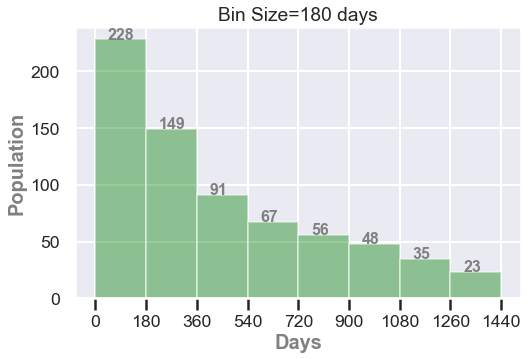

In [36]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(binsize) +" days")
plt.xlabel("Days", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 1501, 180))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

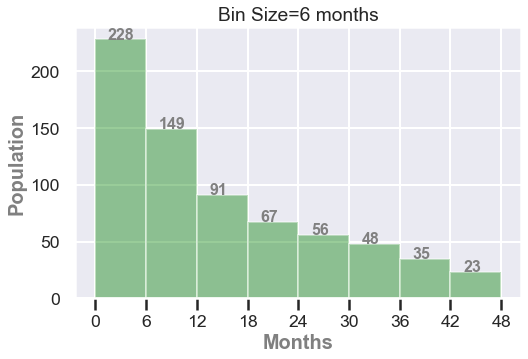

In [37]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 50, 6))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



In [38]:
#pt statistics

df_just_start_empty=df_results[df_results.inital_ADT_start_date.isnull()][df_results.inital_ADT_end_date.notnull()]
df_just_end_empty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.notnull()]
df_both_empty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.isnull()]
df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]

#df_onlystartempty=df_results[df_results.inital_ADT_start_date.isnull()][df_results.inital_ADT_end_date.notnull()]
#df_onlyendempty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.notnull()]
#df_ADT_window_zero=df_results[df_results.Inital_ADT_time_window_days==0]

df_with_ADT_window=df_results[df_results.Inital_ADT_timewindow.notnull()]

print("Number of pts with just start dates empty is: " + str(len(df_just_start_empty)))
print("Number of pts with just end dates empty is: " + str(len(df_just_end_empty)))  
print("Number of pts with both dates empty is: " + str(len(df_both_empty)))
print("Number of pts with both dates: " + str(len(df_both)))
print("Number of pts with ADT window computed: " + str(len(df_with_ADT_window)))


Number of pts with just start dates empty is: 43
Number of pts with just end dates empty is: 291
Number of pts with both dates empty is: 388
Number of pts with both dates: 792
Number of pts with ADT window computed: 792


/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
df_both_empty.to_csv("both_empty.csv", encoding='utf-8', index=False)
df_just_start_empty.to_csv("just_start_empty.csv", encoding='utf-8', index=False)
df_just_end_empty.to_csv("just_end_empty.csv", encoding='utf-8', index=False)
df_with_ADT_window.to_csv("with_ADT_window.csv", encoding='utf-8', index=False)

In [40]:
shape(df_results)

(1514, 6)

In [41]:
792+722

1514

In [42]:
df_pt_zero_adt_window=df_results[(df_results["Inital_ADT_time_window_days"] <= 90)]

In [43]:
len(df_pt_zero_adt_window)

76

In [44]:
#df_results[:50]

In [45]:
679-388

291

In [46]:
388+291+43

722

In [47]:
792-697

95

(-1.1525208050235116,
 1.1093500275904395,
 -1.1225727928132136,
 1.1334515228371496)

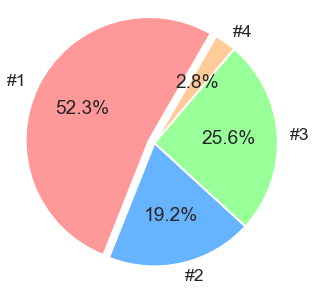

In [48]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '#1', '#2','#3','#4'
sizes = [792,291,388,43]
explode = (0.05, 0.0, 0,0)  #
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots(figsize = (5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.